Epoch: [1/20], Iter: [100/490], cost: 1.930117, train_acc:0.220000
Epoch: [1/20], Iter: [200/490], cost: 2.073897, train_acc:0.340000
Epoch: [1/20], Iter: [300/490], cost: 1.662089, train_acc:0.400000
Epoch: [1/20], Iter: [400/490], cost: 1.561654, train_acc:0.420000
Epoch: 1,cost: 1.611909, test_acc:0.410000
Epoch: [2/20], Iter: [100/490], cost: 1.438789, train_acc:0.490000
Epoch: [2/20], Iter: [200/490], cost: 1.506438, train_acc:0.450000
Epoch: [2/20], Iter: [300/490], cost: 1.346719, train_acc:0.510000
Epoch: [2/20], Iter: [400/490], cost: 1.154130, train_acc:0.590000
Epoch: 2,cost: 1.249464, test_acc:0.530000
Epoch: [3/20], Iter: [100/490], cost: 1.209033, train_acc:0.570000
Epoch: [3/20], Iter: [200/490], cost: 1.264096, train_acc:0.560000
Epoch: [3/20], Iter: [300/490], cost: 1.184137, train_acc:0.600000
Epoch: [3/20], Iter: [400/490], cost: 1.048152, train_acc:0.650000
Epoch: 3,cost: 1.247928, test_acc:0.520000
Epoch: [4/20], Iter: [100/490], cost: 1.026514, train_acc:0.660000


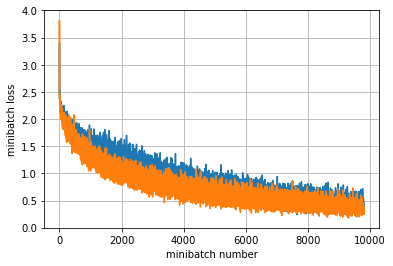

In [6]:
import tensorflow as tf
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import math
from resnet_model import *

# def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
cifar10_dir = './cifar-10-batches-py'
X_train,y_train,X_test,y_test = get_data(cifar10_dir)

### tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, [None,])
is_training = tf.placeholder(tf.bool)

learning_rate = 0.1
cla_score = my_resnet(X, is_training=True, resnet_size=20, num_classes=10, data_format='channels_last')
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=cla_score, labels=tf.one_hot(y,10)))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predict_y = y
is_correct = tf.argmax(cla_score,axis = 1)
is_correct = tf.equal(is_correct, tf.cast(predict_y, tf.int64))
is_correct = tf.cast(is_correct, tf.float32)
accuracy = tf.reduce_mean(is_correct)
# accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
# accuracy = tf.reduce_mean(tf.cast(tf.argmax(cla_score,axis = 1) == y, tf.float32))

train_indicies = np.arange(X_train.shape[0])

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    batch_size = 100
    train_epochs = 20
    cost_history = []
    for epoch in range(1,train_epochs+1):
        avg_cost = 0

        total_batch = int(math.ceil(X_train.shape[0]/batch_size))
        for iter in range(1,total_batch+1):
            start_idx = (iter*batch_size)%X_train.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            feed_dict = {X: X_train[idx,:],y: y_train[idx]}
            c,_ = sess.run([cost, optimizer], feed_dict=feed_dict)
            cost_history.append(c)
            if iter%100 == 0:
              train_acc = sess.run(accuracy, feed_dict=feed_dict)
              print("Epoch: [%d/%d], Iter: [%d/%d], cost: %f, train_acc:%f"%\
                    (epoch, train_epochs, iter, total_batch, c, train_acc))
        shuffle_num = int(np.ceil(np.abs(np.random.randn() * 100)))
        idx_test = train_indicies[shuffle_num:shuffle_num + batch_size]
        test_feed_dict = {X: X_test[idx_test, :], y: y_test[idx_test]}
        c,test_acc = sess.run([cost,accuracy], feed_dict=test_feed_dict)
        print("Epoch: %d,cost: %f, test_acc:%f"%\
              (epoch, c, test_acc))
    plt.plot(cost_history)
    plt.grid(True)
#     plt.title('Epoch {} Loss'.format(e+1))
    plt.xlabel('minibatch number')
    plt.ylabel('minibatch loss')
    plt.show()